

 --------------------From scratch------------------- 


Coefficients:
     B0: 330.1195184533742
     B1: 0.26149658455111924
RMSE: 69.0139031454715


 -------------------USING Sklearn------------------- 


Coefficients:
     B0 330.11951845337353
     B1 0.2614965845511194
RMSE:  69.0139031454715


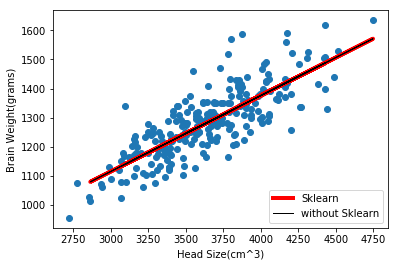

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def split(data,ratio,seed):
    np.random.seed(seed)
    shuffled_indices=np.random.permutation(len(data))
    tss=int(len(data)*ratio)
    tsi=shuffled_indices[:tss]
    tri=shuffled_indices[tss:]
    return data.iloc[tri],data.iloc[tsi]

data=pd.read_csv("file2.csv")
train,test=split(data,0.2,42)

X_train=train['Head Size(cm^3)']
Y_train=train['Brain Weight(grams)']

X_test=test['Head Size(cm^3)']
Y_test=test['Brain Weight(grams)']

def Coefficients(X, Y):
    X_=np.mean(X)
    Y_=np.mean(Y)
    b1=np.sum((X-X_)*(Y-Y_))/np.sum((X-X_)**2)
    b0=Y_-(b1*X_)
    return[b0,b1]

def RMSE(X, Y, B0, B1):
    y_pre=B0+(B1*X)
    return (np.sum((y_pre-Y)**2)/X.shape[0])**0.5

b0,b1=Coefficients(X_train,Y_train)
print("\n"*2,"--------------------From scratch-------------------","\n"*2)

print('Coefficients:')
print("     B0:",b0)
print("     B1:",b1)
print("RMSE:",RMSE(X_test,Y_test,b0,b1))


print("\n"*2,"-------------------USING Sklearn-------------------","\n"*2)

regr = linear_model.LinearRegression()

x_train=np.vstack((np.ones(X_train.shape), X_train)).T
x_test=np.vstack((np.ones(X_test.shape), X_test)).T


regr.fit(x_train,Y_train.values)
print('Coefficients:')
print('     B0',regr.intercept_)
print('     B1',regr.coef_[1])
ypre=regr.predict(x_test)
print("RMSE: ",mean_squared_error(Y_test.values, ypre)**0.5)

plt.scatter(X,Y)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.plot(X_test,ypre,'-r',linewidth=4)
plt.plot(X_test,b0+b1*X_test,'-',color='black',linewidth=1)
plt.legend(['Sklearn', 'without Sklearn'], loc=4)
plt.show()

